In [1]:
# 구글 드라이브 마운트(cjyjob1993@gmail.com)
from google.colab import drive
drive.mount('/content/drive')

# lib 디렉토리를을 환경 변수에 추가
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/myCode/lib')

Mounted at /content/drive


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# 커스텀 라이브러리 임포트
from func_pandas_exploreDataFrame import exploreDataFrame
from func_debug_log import debug

In [3]:
# debug_log (0 : 미출력, 1 : 출력)
debug_flag = 1

In [4]:
if debug_flag == 1 : debug('시드 고정', __name__)
np.random.seed(42)
tf.random.set_seed(42)

2022.12.01 18:38:56 __main__ 시드 고정


In [5]:
if debug_flag == 1 : debug('데이터 로드', __name__)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

2022.12.01 18:38:56 __main__ 데이터 로드


In [6]:
if debug_flag == 1 : debug('데이터 시각화', __name__)
exploreDataFrame(df)

2022.12.01 18:38:56 __main__ 데이터 시각화
(150, 5) 

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6

In [7]:
if debug_flag == 1 : debug('label column 추출', __name__)
label = df.iloc[0:100, 4].values

2022.12.01 18:38:56 __main__ label column 추출


In [8]:
if debug_flag == 1 : debug('label을 0,1 의 binary로 전처리', __name__)
label = np.where(label == 'Iris-setosa', 0, 1)
label.astype(object)

2022.12.01 18:38:56 __main__ label을 0,1 의 binary로 전처리


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

In [9]:
if debug_flag == 1 : debug('feature data 추출', __name__)
features = df.iloc[0:100, [0, 2]].values

2022.12.01 18:38:56 __main__ feature data 추출


2022.12.01 18:38:56 __main__ 데이터 시각화


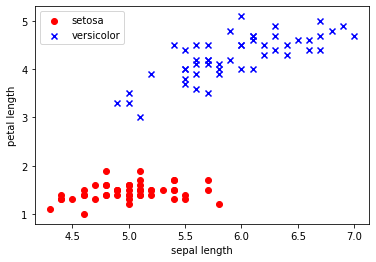

In [10]:
if debug_flag == 1 : debug('데이터 시각화', __name__)
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [11]:
if debug_flag == 1 : debug('test, train 데이터 분할', __name__)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

2022.12.01 18:38:56 __main__ test, train 데이터 분할


In [12]:
if debug_flag == 1 : debug('출력층만 있는 단층 신경망 구축', __name__)
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(1, activation='sigmoid') # 출력층 노드 1개, 활성화 함수 sigmoid
    ]
)

# 동일한 모델 구축의 다른 표현
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

2022.12.01 18:38:56 __main__ 출력층만 있는 단층 신경망 구축


In [13]:
if debug_flag == 1 : debug('구축한 모델 컴파일', __name__)
model.compile(optimizer='sgd', # 옵티마이저
    loss = 'binary_crossentropy', # 손실 함수
    metrics=['accuracy']) # 지표

2022.12.01 18:38:56 __main__ 구축한 모델 컴파일


In [14]:
if debug_flag == 1 : debug('모델 훈련', __name__)
model.fit(X_train, y_train, epochs=30)

2022.12.01 18:38:56 __main__ 모델 훈련
Epoch 1/30
3/3 [==============================] - 3s 7ms/step - loss: 1.0814 - accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0017 - accuracy: 0.5250
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 0.9433 - accuracy: 0.5250
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8986 - accuracy: 0.5250
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.8627 - accuracy: 0.5250
Epoch 6/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8413 - accuracy: 0.5250
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8181 - accuracy: 0.5250
Epoch 8/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8036 - accuracy: 0.5250
Epoch 9/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7901 - accuracy: 0.5250
Epoch 10/30
3/3 [==============================] - 0s 4ms/step - loss: 0.7797 - accuracy: 0.5250
Epoc

In [15]:
if debug_flag == 1 : debug('학습된 모델 평가', __name__)
model.evaluate(X_test, y_test, verbose=2)

2022.12.01 18:38:56 __main__ 학습된 모델 평가
1/1 - 0s - loss: 0.6629 - accuracy: 0.4000 - 107ms/epoch - 107ms/step


[0.6628996133804321, 0.4000000059604645]